## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Deventhiran Ranganathan

Student ID: 23315695

<hr style="border:2px solid gray"> </hr>

## Imports

In [635]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [636]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [637]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [638]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [639]:
weights = linreg_weights(X,y)
print("weights vector",weights)
pred= linreg_predict(weights,X)
print("predictions",pred)

weights vector [[-99.46431881]
 [564.20389249]]
predictions [[1452.09638554]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1169.9944393 ]
 [1169.9944393 ]
 [1169.9944393 ]
 [1028.94346617]
 [1028.94346617]
 [1028.94346617]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]]


(0.0, 3.0, -100.0, 1500.0)

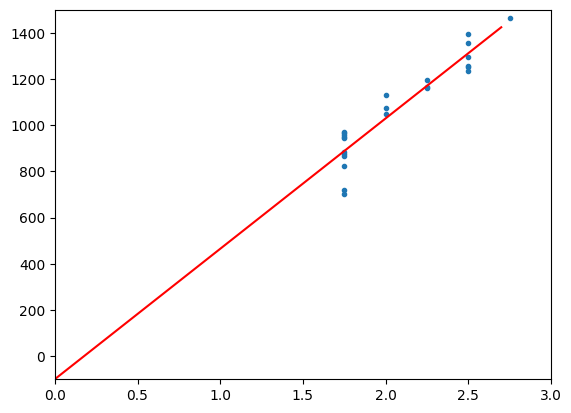

In [640]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

## <u>Introduction</u>

A linear regression model establishes the relation between a dependent variable(y) and at least one independent variable(x).

Above reference implementation uses the Ordinary Least Squares method and the expression used here is                        
 $ (X^T \cdot X)^{-1} \cdot X^T \cdot y$
    Here $(X^{-1})$ is inverse of matrix, .$(X^T)$  is transpose of matrix, dot is multiplication of matrix

Lets explore each of them and write functions in python

### <u>Matrix operations</u></br>
Below class Matrix_operations is used to implement the basic matrix operations required for linear regression
  
   -  Dot matrix <br>
   -  Inverse <br>
   -  Transpose <br>
   -  Determinant(required to find inverse) <br>

In [641]:
class InvalidInputError(Exception):
    """Exception raised when invalid input provied.

        message -- explanation of the error
    """

    def __init__(self, message):
        self.message = message
        super().__init__(self.message)

In [642]:
class Matrix:
    """ This class has matrix implementation of all the required functions for Linear regression"""
    
    def __init__(self) -> None:
        pass

    def determinant(self,X):
        """ This method is used to caculate the determinant of given 2x2 matrix
        bigger than 2x2 are not in the scope
        """
        if (len(X) == 2 and len(X[0]) ==2):
            return X[0][0]*X[1][1]-X[0][1]*X[1][0]
        else:
            raise InvalidInputError("Determinant fuction supports only 2x2 matrix")
        
    def dot(self,x : list, W):
        """ Dot product function is used to multiply vector with matrix
               
        """
        return [sum(a*b for a,b in zip(row, x)) for row in W]
    
    def multiply(self,X,Y):
        """ multiply method is used to multiply 2 metrices and
        produces result as another metrices 

        the number of columns in the first matrix must be equal to the number of rows in the second matrix
        
        """
        if len(X[0]) == len(Y):
            return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]
        else:
            raise InvalidInputError("Number of columns in the first matrix must be equal to the number of rows in the second matrix")

    
    def transpose(self,X):
        """ Transponse of matrix which flips a matrix over it s diagonal and switches the row and colmun indices of the matrix
        argument -> input matrix

        returns ->Transpose of input matrix
        """
        return [[X[j][i] for j in range(len(X))] for i in range(len(X[0]))]
    
    def inverse(self,X):
        """ Inverse method is used to calculate the inverse of a given matrix
         and this method supports only 2x2 martrix
        """

        if (len(X) == 2 and len(X[0]) ==2):
            determinant = self.determinant(X)
            if determinant == 0:
                raise InvalidInputError("Determinant can't be zero")
            return np.array([[X[1][1]/determinant, -1*X[0][1]/determinant],
                    [-1*X[1][0]/determinant, X[0][0]/determinant]])
        else:
            raise InvalidInputError("Inverse fucntion supports only 2x2 matrix")

<hr style="border:1px solid gray"> </hr>

## <u>Matrix Multiplication</u>

For matrix Multiplication , the number of columns in the first matrix must be equal to the number of rows in the second matrix.

The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix

$$
\left [
\begin{matrix}
0 & 4 \\
2 & -2\\
-3 & -1\\
1 & 4
\end{matrix}
\right ]
.
\left [
\begin{matrix}
0 & 3 & 5\\
6 & -4 & 7
\end{matrix}
\right ]
=
\left [
\begin{matrix}
0*0 + -4*6 & 0*3 + -4*6 & 0*0 + -4*6 \\
2*0 + -2*6 & 2*0 + -2*6 & 2*0 + -2*6 \\
-3*0 + -1*6 & -3*0 + -1*6 & -3*0 + -1*6 \\
1*0 + 4*6 & 1*0 + 4*6 & 1*0 + 4*6
\end{matrix}
\right ]
$$
$$
=
\left [
\begin{matrix}
-24 & 16 & -28\\
-12 & 14 & -4\\
-6 & -5 & 22\\
24 & -13 & 33
\end{matrix}
\right ]
$$

In [643]:
mat=Matrix()

# Success case
n=np.array([[0,-4],[2,-2],[-3,-1],[1,4]])
m=np.array([[0,3,5],[6,-4,7]])

print("Test case1\n ",np.array(mat.multiply(n,m)))

# Success case
n=np.array([[0,-4],[2,-2],[-3,-1],[1,4]])
m=np.array([[5],[6]])

print("\nTest case 2 \n",np.array(mat.multiply(n,m)))

# invalid col and row size 

n=np.array([[0,-4],[2,-2],[-3,-1],[1,4]])
m=np.array([[0,3,5],[6,-4,7],[6,-4,7]])

try:
    mat.multiply(n,m)
except InvalidInputError as exception:
    print('\nTest case 3\nInvalid Input Error: %s' % (exception.message) )

Test case1
  [[-24  16 -28]
 [-12  14  -4]
 [ -6  -5 -22]
 [ 24 -13  33]]

Test case 2 
 [[-24]
 [ -2]
 [-21]
 [ 29]]

Test case 3
Invalid Input Error: Number of columns in the first matrix must be equal to the number of rows in the second matrix


<hr style="border:1px solid gray"> </hr>

## <u>Transpose of Matrix</u>

Transpose of a matrix is an operator which flips a matrix over its diagonal; that is, it switches the row and column indices of the matrix A by producing another matrix, often denoted by $ A^T$

$$
\left [
\begin{matrix}
1 & 2 \\
3 & 4\\
5 & 6
\end{matrix}
\right ] ^T
=
\left [
\begin{matrix}
1 & 3 & 5 \\
2 & 4 & 6
\end{matrix}
\right ]
$$

In [644]:
input_matrix=np.array([[1,2],[3,4],[5,6]])
mat=Matrix()

print("Transpose of matrix:")
print(mat.transpose(input_matrix))

Transpose of matrix:
[[1, 3, 5], [2, 4, 6]]


<hr style="border:1px solid gray"> </hr>

## Determinant of Matrix

In mathematics, the determinant is a scalar value that is a function of the entries of a square matrix. The determinant of a matrix A is commonly denoted det(A), det A, or |A|. Its value characterizes some properties of the matrix and the linear map represented by the matrix. In particular, the determinant is nonzero if and only if the matrix is invertible and the linear map represented by the matrix is an isomorphism. The determinant of a product of matrices is the product of their determinants (which follows directly from the above properties).

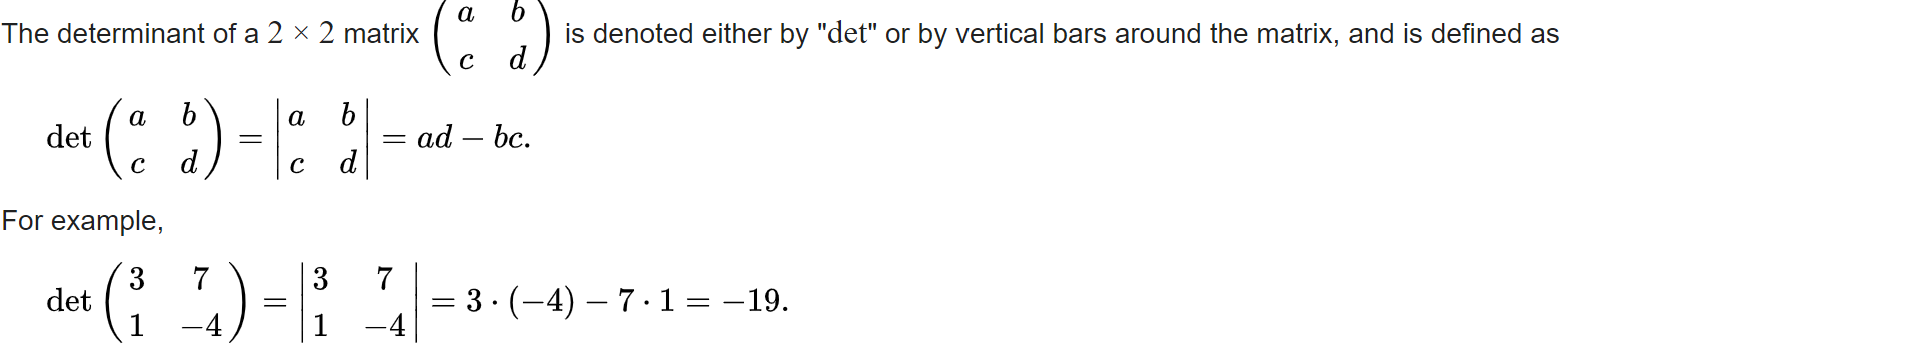

In [645]:
mat=Matrix()

input_matrix=np.array([[3,1],[7,-4]])
print("Determinant of matrix:",mat.determinant(input_matrix))

# Test case of other than 2X2 matrix

try:
    input_matrix1=np.array([[3,1,5],[7,-4,6]])
    print("Determinant of matrix:",mat.determinant(input_matrix1))
except InvalidInputError as exception1:
    print('Invalid Input Error: %s' % (exception1.message) )

Determinant of matrix: -19
Invalid Input Error: Determinant fuction supports only 2x2 matrix


<hr style="border:1px solid gray"> </hr>

## Inverse of matrix

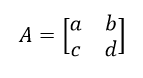

Given A is as above, in order to calculate the inverse A^{-1},

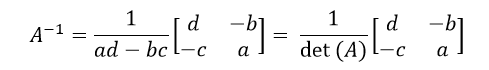

It must be noted that in order for this to be true, det(A) cannot equal to 0. A matrix with its determinant equal to zero does not have an inverse.

Application

Given that:

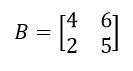

Find the inverse of B.

First of all, find the determinant a * d – b * c.
det(B) = 4*5 – 6*2 = 8

Apply the formula for the inverse. This gives:

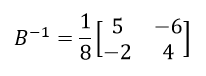

In [646]:

mat=Matrix()

# Success case
m=np.array([[12, 2],[-10,5]])
print("Inverse of matrix:")
print(mat.inverse(m))

# Non 2x2 nmatrix case
try:
    m=np.array([[4, 2,4],[10,5,6]])
    print(mat.inverse(m))
except InvalidInputError as exception:
    print('Invalid Input Error: %s' % (exception.message) )

# 0 determinent case
try:
    m=np.array([[4, 2,],[10,5]])
    print(mat.inverse(m))
except InvalidInputError as exception:
    print('Invalid Input Error: %s' % (exception.message) )

Inverse of matrix:
[[ 0.0625 -0.025 ]
 [ 0.125   0.15  ]]
Invalid Input Error: Inverse fucntion supports only 2x2 matrix
Invalid Input Error: Determinant can't be zero


<hr style="border:1px solid gray"> </hr>

                                        # Linear regression 
  Below python class is created to implement the fit, predicts and get_params functions used in linear regression

In [647]:
class Linear_Reg:
  """ This class is used to implement the fuctions used to 
  caculate  the least square regression """

  def __init__(self,X,y) -> None:
    """ constructor to initialize  X any y metrices and matrix class"""

    self.matrix=Matrix()
    self.X=X
    self.y=y


  def fit(self):
    """
      Fit function takes two matrix inputs and returns weight vector
      uses the below represent implementation to derive the weight vector
      np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
      
    """
    xt= self.matrix.transpose(X)
    mul_of_xt_and_x= self.matrix.multiply(xt,X)
    inv_of_mul_of_xt_and_x= self.matrix.inverse(mul_of_xt_and_x)
    interm_result=self.matrix.multiply(inv_of_mul_of_xt_and_x,xt)
    return self.matrix.multiply(interm_result,np.array(y))
  
  def get_params(self):
    """returns the weights found by the fit method """
    return self.fit();


  def predict(self,w):
    """
    predict function takes weight vector calculated by fit method and matrix X and produces another matrix
    uses the below represent implementation to derive the weight vector
    w.T.dot(x) 
    """
    out=[]
    tran_of_w=self.matrix.transpose(w)
    for x in X:
      #result=self.matrix.multiply(tran_of_w,x) # x is 1D array so converting them to 2D using[:,None]
      result=self.matrix.dot(x,tran_of_w)
      out.append(result) 
    return np.array(out)

In [648]:
# Test get_params and predict method
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

# Initialize the model
reg=Linear_Reg(X,y)

# fit the linear regression model
weight_vector=reg.get_params()
print("weight vector", weight_vector)

#make predictions
predictions = reg.predict(weight_vector)
print("predictions",reg.predict(weight_vector))



weight vector [[-99.4643188137135], [564.2038924930501]]
predictions [[1452.09638554]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1311.04541242]
 [1169.9944393 ]
 [1169.9944393 ]
 [1169.9944393 ]
 [1028.94346617]
 [1028.94346617]
 [1028.94346617]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]
 [ 887.89249305]]


(0.0, 3.0, -100.0, 1500.0)

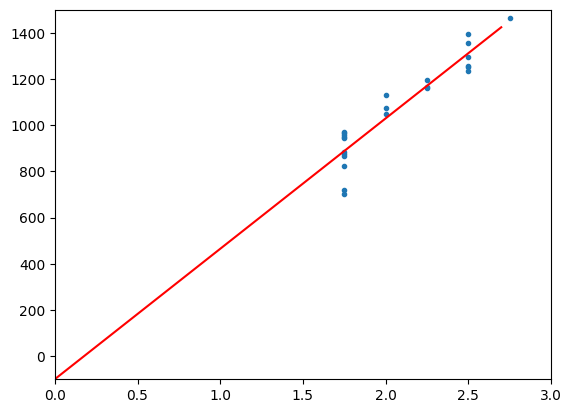

In [649]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weight_vector[1]+weight_vector[0],'r')
plt.axis([0, 3, -100, 1500])



## Reflection

Write your reflection in below cell.

<u>Description of code:</u>

Matrix class used to find the inverse, transpose, determinant and multiplication of given matrix
and Linear_Reg class used to implement the fit and prediction model for linear regression 

<u>Advantages:</u>

created reusable functions for matrix manipulations
Tested with variety of test case

<u>Disadvantages:</u>

instead of simple for loop I can go with comprehensive for loop 
I will try this in the next week 

<u>Peers work:</u>

I haven’t look the peers work yet, definitely I will look for an improvement by looking their code in the 2nd week.